###### ideas brainstorming

idea: streamlit app giving probabilistic health outcomes

###### Imports and read in data

In [1]:
import numpy as np
import pandas as pd
import re
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[loading file paths source](https://www.youtube.com/watch?v=kem2y-SawPw)

In [2]:
ch83dg = pd.read_csv('../data/cleaned_data/ch83dg.csv')
ch83m = pd.read_csv('../data/cleaned_data/ch83m.csv')
ch83pru = pd.read_csv('../data/cleaned_data/ch83pru.csv')
ch83q = pd.read_csv('../data/cleaned_data/ch83q.csv')
ch89dg = pd.read_csv('../data/cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('../data/cleaned_data/ch89m.csv')
ch89pru = pd.read_csv('../data/cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('../data/cleaned_data/ch89q.csv')
ch93pru = pd.read_csv('../data/cleaned_data/ch93pru.csv')
ch93q = pd.read_csv('../data/cleaned_data/ch93q.csv')
chtaim = pd.read_csv('../data/cleaned_data/chtaim.csv')
chtaipru = pd.read_csv('../data/cleaned_data/chtaipru.csv')
chtaiq = pd.read_csv('../data/cleaned_data/chtaiq.csv')

###### renaming mortality columns to be more descriptive

In [3]:
# all the descriptive columns for ch89m

mortality_cols_descriptive = \
['ALL0_4','ALL5_14','ALL15_34','ALL0_34','ALL35_69','ALL70_79','MEDICALb', 'MEDICALc',
'NONMEDb', 'NONMEDc', 'INFECTb', 'INFECTc', 'INTESTINb', 'INTESTINc','PULMTBb',
'PULMTBc', 'OTHERTBb', 'OTHERTBc', 'VIRALHEPb', 'VIRALHEPc', 'SCHISTOc', 'ALLCAb', 
'ALLCAc', 'MOUTHCAc', 'NASOPCAc', 'NPConlyc', 'OESOPHCAc', 'OESOPHCAc', 'COLRECCAc', 'LIVERCAb', 
'LIVERCAc', 'PANCRSCAc', 'BLADDCAc', 'LARYNXCAc', 'LUNGCAmc', 'LUNGCAfc', 'BREASTCAc', 'CERVIXCAc', 
'BRAINCAc', 'LYMPHOMAc', 'LEUKEMIAb', 'LEUKEMIAc', 'ENDOCRINb', 'ENDOCRINc', 'DIABETESc', 'MALNUTRIb', 
'MALNUTRIc', 'BLOODb', 'BLOODc', 'MENTALb', 'MENTALc', 'NERVOUSb', 'NERVOUSc', 'MENINGITb', 'MENINGITc', 
'EPILEPSYb', 'EPILEPSYc', 'ALLVASCb', 'ALLVASCc', 'RHEUMHDb', 'RHEUMHDc', 'HYPTENSc', 'IHDc', 'STROKEb', 'STROKEc',
'VASC_STRb', 'VASC-STRc', 'ALLRESPb', 'ALLRESPc', 'PNEUMONb', 'PNEUMONc', 'COPDc', 'DIGESTIVb', 'DIGESTIVc',
'PEPULCERc', 'ENTCOLc', 'INTESTOBc', 'CIRRHOSb', 'CIRRHOSc', 'TOTLIVRb', 'TOTLIVRc', 'GALLBILc', 'GENITURc',
'GENITURmc', 'GENITURfc', 'RENALc', 'PREGBRTHb', 'PREGBRTHc', 'ALLSKINc', 'MUSCSKELc', 'ILL_DEFb', 'ILL_DEFc',
'ACCIDENTb', 'ACCIDENTc', 'ROADACCb', 'ROADACCc', 'DROWNb', 'DROWNc', 'SUICIDEb', 'SUICIDEc', 'HOMICIDEb',
'HOMICIDEc', 'INFANT', 'MATERNAL', 'ALLCUMa', 'MEDICALa', 'NONMEDa', 'RESPINFa', 'ALLGIa', 'CONGENITa', 
'NTDa', 'CONGENHDa', 'PERINATa', 'LOWBTHWTa', 'BTHTRAUMa', 'RDSa', 'NEOTETANa', 'MALNUTRIa', 'DROWNa'
]

In [4]:
cols_0_3 = ch89m.columns[0:4]

In [5]:
new_cols = list(cols_0_3) + list(mortality_cols_descriptive)

[concatenate elementwise](https://stackoverflow.com/questions/51482134/concatenate-zipped-values-in-python)

In [6]:
new_cols[4:] = [f'{code}_{descr}' for code, descr in \
                zip(ch89m.columns.values[4:], mortality_cols_descriptive)]

In [7]:
ch83m

,Unnamed: 0,county,sex,xiang,m001,m002,m003,m004,m005,m006,...,m086,m087,m088,m103,m104,m105,m106,m107,m113,m117
0,2,AA,M,3,3.67,72.03,124.01,143.89,14.87,97.10,...,15.59,NaN,NaN,14.44,NaN,18.36,10.61,7.75,4.13,0.00
1,5,AA,F,3,3.20,42.49,74.48,100.46,7.67,59.48,...,12.62,1.00,0.00,12.64,0.31,16.02,9.71,6.30,4.73,0.09
2,8,AA,T,3,3.44,57.26,99.25,122.17,11.27,78.29,...,14.11,NaN,NaN,13.54,NaN,17.19,10.16,7.03,4.43,0.04
3,11,AB,M,3,5.01,67.69,138.61,170.09,16.66,110.54,...,21.42,NaN,NaN,13.81,NaN,25.04,14.33,10.71,3.97,0.00
4,14,AB,F,3,3.84,51.36,101.97,127.78,8.83,65.11,...,19.69,1.75,0.40,11.57,0.37,19.19,11.97,7.22,3.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,608,XB,F,3,25.79,182.44,286.46,584.29,17.23,106.26,...,23.47,16.83,23.13,74.49,2.82,128.97,121.10,7.87,46.54,23.43
203,611,XB,T,3,27.24,205.87,265.10,599.48,18.75,123.89,...,40.98,NaN,NaN,80.83,NaN,136.22,128.62,7.60,49.30,23.43
204,614,YA,M,3,16.37,105.44,136.85,342.13,19.35,81.86,...,34.04,NaN,NaN,58.34,NaN,81.83,78.47,3.36,25.43,7.34
205,617,YA,F,3,12.38,88.46,149.67,287.72,15.81,65.08,...,21.45,15.98,18.25,45.11,3.55,61.92,59.29,2.63,18.20,4.83


In [8]:
mortality_renaming = dict(zip(ch89m.columns.values,new_cols))

In [9]:
mortality_renaming

{'Unnamed: 0': 'Unnamed: 0',
 'county': 'county',
 'sex': 'sex',
 'xiang': 'xiang',
 'm001': 'm001_ALL0_4',
 'm002': 'm002_ALL5_14',
 'm003': 'm003_ALL15_34',
 'm004': 'm004_ALL0_34',
 'm005': 'm005_ALL35_69',
 'm006': 'm006_ALL70_79',
 'm007': 'm007_MEDICALb',
 'm008': 'm008_MEDICALc',
 'm009': 'm009_NONMEDb',
 'm010': 'm010_NONMEDc',
 'm011': 'm011_INFECTb',
 'm012': 'm012_INFECTc',
 'm013': 'm013_INTESTINb',
 'm014': 'm014_INTESTINc',
 'm015': 'm015_PULMTBb',
 'm016': 'm016_PULMTBc',
 'm017': 'm017_OTHERTBb',
 'm018': 'm018_OTHERTBc',
 'm019': 'm019_VIRALHEPb',
 'm020': 'm020_VIRALHEPc',
 'm021': 'm021_SCHISTOc',
 'm022': 'm022_ALLCAb',
 'm023': 'm023_ALLCAc',
 'm024': 'm024_MOUTHCAc',
 'm025': 'm025_NASOPCAc',
 'm026': 'm026_NPConlyc',
 'm027': 'm027_OESOPHCAc',
 'm028': 'm028_OESOPHCAc',
 'm029': 'm029_COLRECCAc',
 'm030': 'm030_LIVERCAb',
 'm031': 'm031_LIVERCAc',
 'm032': 'm032_PANCRSCAc',
 'm033': 'm033_BLADDCAc',
 'm034': 'm034_LARYNXCAc',
 'm035': 'm035_LUNGCAmc',
 'm036': 'm

In [10]:
# rename mortality 

ch83m.rename(mapper = mortality_renaming, axis = 1, inplace=True)
ch89m.rename(mapper = mortality_renaming, axis = 1, inplace=True)
chtaim.rename(mapper = mortality_renaming, axis = 1, inplace=True)


In [11]:
ch89m

,Unnamed: 0,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,2,AA,M,3,4.39,74.75,89.04,134.95,15.08,104.05,...,3.84,0.46,1.84,7.83,2.61,2.00,0.77,0.00,0.00,4.61
1,5,AA,F,3,2.83,68.53,60.71,94.76,7.49,50.53,...,2.68,0.31,0.63,6.14,1.89,2.05,0.31,0.00,0.00,1.57
2,8,AA,T,3,3.61,71.64,74.88,114.86,11.29,77.29,...,3.26,0.39,1.24,6.99,2.25,2.02,0.54,0.00,0.00,3.09
3,11,AB,M,3,4.07,43.33,94.72,124.64,15.37,92.53,...,3.31,0.50,1.82,9.60,4.47,0.83,0.66,0.00,0.00,3.47
4,14,AB,F,3,3.20,32.98,77.51,99.40,8.27,57.23,...,3.69,0.70,2.11,6.33,3.16,0.18,1.41,0.00,0.00,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,608,XB,F,3,17.07,91.35,259.99,418.57,13.94,126.59,...,4.21,1.40,0.18,49.43,4.56,31.38,8.59,0.00,0.53,0.35
197,611,XB,T,3,16.41,85.92,254.12,404.19,18.88,140.51,...,3.88,1.15,0.62,46.26,3.52,28.02,9.09,0.09,0.62,0.17
198,614,YA,M,3,3.82,167.69,131.09,177.34,24.37,58.51,...,0.00,0.00,0.00,2.12,0.00,0.00,0.00,0.00,0.00,0.00
199,617,YA,F,3,3.45,134.49,77.99,132.34,11.52,39.98,...,0.00,0.00,0.00,1.92,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
ch83m.drop('Unnamed: 0', axis = 1, inplace=True)
ch89m.drop('Unnamed: 0', axis = 1, inplace=True)
chtaim.drop('Unnamed: 0', axis = 1, inplace=True)

In [13]:
chtaim

,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,ZA,M,3,1.47,32.93,126.73,102.77,9.70,50.75,45.37,...,2.05,0.18,1.33,1.01,0.43,0.06,0.12,0.0,0.01,0.24
1,ZA,F,3,1.28,20.17,56.51,56.34,6.23,42.35,35.02,...,1.83,0.15,1.05,0.95,0.45,0.06,0.14,0.0,0.00,0.11
2,ZA,T,3,1.38,26.55,91.62,79.56,7.96,46.55,40.20,...,1.94,0.17,1.19,0.98,0.44,0.06,0.13,0.0,0.01,0.17
3,ZB,M,3,1.80,42.42,146.06,121.35,11.21,58.36,50.72,...,2.03,0.14,1.34,1.42,0.78,0.03,0.21,0.0,0.00,0.42
4,ZB,F,3,1.49,22.27,62.24,63.18,7.46,46.53,38.81,...,1.79,0.20,1.25,1.34,0.77,0.07,0.13,0.0,0.00,0.26
5,ZB,T,3,1.65,32.34,104.15,92.27,9.34,52.45,44.77,...,1.91,0.17,1.30,1.38,0.78,0.05,0.17,0.0,0.00,0.34
6,ZC,M,3,1.77,41.51,144.27,119.54,10.92,61.29,48.01,...,1.98,0.20,1.27,1.29,0.58,0.07,0.21,0.0,0.00,0.71
7,ZC,F,3,1.43,27.36,64.83,65.30,7.05,45.49,37.68,...,1.93,0.15,1.18,1.24,0.74,0.03,0.16,0.0,0.02,0.28
8,ZC,T,3,1.60,34.44,104.55,92.42,8.98,53.39,42.84,...,1.96,0.18,1.23,1.27,0.66,0.05,0.18,0.0,0.01,0.49
9,ZD,M,3,2.86,65.84,201.97,175.04,9.97,51.76,65.93,...,1.68,0.21,0.42,3.57,2.31,0.21,0.42,0.0,0.00,1.26


In [14]:
# export to cleaned_data_descriptive


ch89m['county'].fillna('NA', inplace=True) 
# ch89m had the county label "NA" replaced with NAN values 

ch83m.to_csv('../data/cleaned_data_descriptive/ch83m.csv',index=False)
ch89m.to_csv('../data/cleaned_data_descriptive/ch89m.csv')
chtaim.to_csv('../data/cleaned_data_descriptive/chtaim.csv')

###### general EDA ideas

EDA ideas:

smoking and respiratory questionaire results

cancer and food consumption

infections and income

all vascular disease mortality and food consumption

liver disease and alcohol




###### Mortality data EDA

In [15]:
ch89m.shape, ch83m.shape, chtaim.shape

# there are more mortality features in 
# ch89m than in ch83m. fewer observations in chtaim

((201, 122), (207, 71), (48, 121))

In [16]:
chtaim.loc[:,'county'].nunique()
# there are only 16 counties in the taiwan mortality data

16

In [17]:
ch89m.loc[:,'county'].nunique() # 66 counties

67

In [18]:
ch83m.loc[:,'county'].nunique() # 68 counties

68

In [19]:
ch83m.head()

,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,...,m086_RENALc,m087_PREGBRTHb,m088_PREGBRTHc,m103_INFANT,m104_MATERNAL,m105_ALLCUMa,m106_MEDICALa,m107_NONMEDa,m113_PERINATa,m117_NEOTETANa
0,AA,M,3,3.67,72.03,124.01,143.89,14.87,97.10,80.00,...,15.59,NaN,NaN,14.44,NaN,18.36,10.61,7.75,4.13,0.00
1,AA,F,3,3.20,42.49,74.48,100.46,7.67,59.48,60.57,...,12.62,1.00,0.0,12.64,0.31,16.02,9.71,6.30,4.73,0.09
2,AA,T,3,3.44,57.26,99.25,122.17,11.27,78.29,70.28,...,14.11,NaN,NaN,13.54,NaN,17.19,10.16,7.03,4.43,0.04
3,AB,M,3,5.01,67.69,138.61,170.09,16.66,110.54,91.44,...,21.42,NaN,NaN,13.81,NaN,25.04,14.33,10.71,3.97,0.00
4,AB,F,3,3.84,51.36,101.97,127.78,8.83,65.11,80.46,...,19.69,1.75,0.4,11.57,0.37,19.19,11.97,7.22,3.75,0.00


I will inspect the mortality dataframe.

In [20]:
ch83m.loc[:,"county"].isna()==1

0      False
1      False
2      False
3      False
4      False
       ...  
202    False
203    False
204    False
205    False
206    False
Name: county, Length: 207, dtype: bool

In [21]:
list(ch83m[ch83m.loc[:,"county"].isna()==1].index.values)

[102, 103, 104]

In [22]:
# county with name NA was made into a nan value durring data cleaning,
# and so I am manually updating the value
ch83m.loc[ch83m[ch83m.loc[:,"county"].isna()==1].index.values,'county'] = "NA"

The data are in floating point numbers and there are 68 categories/subcategories of death attribution.

In [23]:
ch83m.columns

Index(['county', 'sex', 'xiang', 'm001_ALL0_4', 'm002_ALL5_14',
       'm003_ALL15_34', 'm004_ALL0_34', 'm005_ALL35_69', 'm006_ALL70_79',
       'm007_MEDICALb', 'm008_MEDICALc', 'm009_NONMEDb', 'm010_NONMEDc',
       'm011_INFECTb', 'm012_INFECTc', 'm015_PULMTBb', 'm016_PULMTBc',
       'm017_OTHERTBb', 'm018_OTHERTBc', 'm021_SCHISTOc', 'm022_ALLCAb',
       'm023_ALLCAc', 'm025_NASOPCAc', 'm027_OESOPHCAc', 'm028_OESOPHCAc',
       'm029_COLRECCAc', 'm030_LIVERCAb', 'm031_LIVERCAc', 'm033_BLADDCAc',
       'm035_LUNGCAmc', 'm036_LUNGCAfc', 'm037_BREASTCAc', 'm038_CERVIXCAc',
       'm039_BRAINCAc', 'm040_LYMPHOMAc', 'm041_LEUKEMIAb', 'm042_LEUKEMIAc',
       'm043_ENDOCRINb', 'm044_ENDOCRINc', 'm045_DIABETESc', 'm048_BLOODb',
       'm049_BLOODc', 'm058_ALLVASCb', 'm059_ALLVASCc', 'm060_RHEUMHDb',
       'm061_RHEUMHDc', 'm062_HYPTENSc', 'm063_IHDc', 'm064_STROKEb',
       'm065_STROKEc', 'm066_VASC_STRb', 'm067_VASC-STRc', 'm068_ALLRESPb',
       'm069_ALLRESPc', 'm070_PNEUMONb', 'm0

In [24]:
ch83m.shape

(207, 71)

''

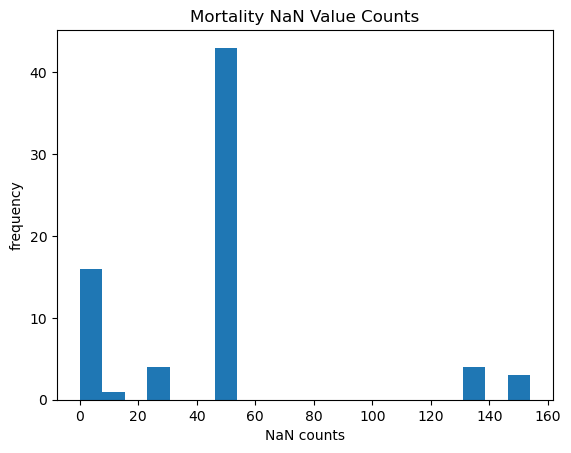

In [25]:
# how many nan values?

plt.hist(ch83m.isna().sum().values, bins = 20)
plt.title('Mortality NaN Value Counts')
plt.xlabel('NaN counts')
plt.ylabel('frequency')
;

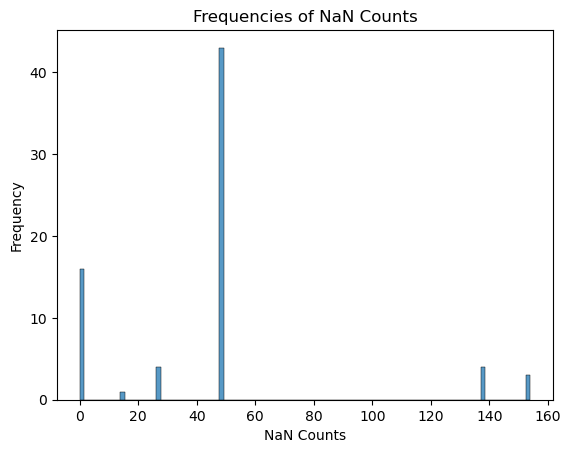

In [26]:
sns.histplot(ch83m.isna().sum().values, bins = 100).set(
    title="Frequencies of NaN Counts", xlabel='NaN Counts', ylabel='Frequency');

In [27]:
nan_dict = {'M':ch83m[ch83m['sex']=='M'].isna().sum(), 
            'F':ch83m[ch83m['sex']=='F'].isna().sum(), 
            'T':ch83m[ch83m['sex']=='T'].isna().sum()}
missing_vals = pd.DataFrame.from_dict(nan_dict)
missing_vals.head()

,M,F,T
county,0,0,0
sex,0,0,0
xiang,0,0,0
m001_ALL0_4,9,9,9
m002_ALL5_14,9,9,9


I'll check if missing values are consistent by sex. This [source](https://www.statology.org/pandas-check-if-multiple-columns-are-equal/) provided code.

In [28]:
# I'll check if missing values are consistent my sex
missing_vals.eq(missing_vals.iloc[:, 0], axis=0).all(1).sum()


64

In [29]:
# there are slightly more nan values for the male categories than female.
missing_vals.sum()

M    1143
F     846
T    1212
dtype: int64

In [30]:
ch89m_cols_descr = pd.Series(data=new_cols, name='ch89m_cols_descr')
ch89m_cols_descr.to_csv('../data/descriptive_columns/ch89m_cols_descr.csv')

There may be different age distributions between counties.  Not sure how to correct for this, get deaths per 100_000 of folks in that age band...

Now looking for the most prevalent **recorded** causes of mortality ...

In [31]:
ch89m

,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,AA,M,3,4.39,74.75,89.04,134.95,15.08,104.05,77.25,...,3.84,0.46,1.84,7.83,2.61,2.00,0.77,0.00,0.00,4.61
1,AA,F,3,2.83,68.53,60.71,94.76,7.49,50.53,58.71,...,2.68,0.31,0.63,6.14,1.89,2.05,0.31,0.00,0.00,1.57
2,AA,T,3,3.61,71.64,74.88,114.86,11.29,77.29,67.98,...,3.26,0.39,1.24,6.99,2.25,2.02,0.54,0.00,0.00,3.09
3,AB,M,3,4.07,43.33,94.72,124.64,15.37,92.53,81.23,...,3.31,0.50,1.82,9.60,4.47,0.83,0.66,0.00,0.00,3.47
4,AB,F,3,3.20,32.98,77.51,99.40,8.27,57.23,66.20,...,3.69,0.70,2.11,6.33,3.16,0.18,1.41,0.00,0.00,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,XB,F,3,17.07,91.35,259.99,418.57,13.94,126.59,359.37,...,4.21,1.40,0.18,49.43,4.56,31.38,8.59,0.00,0.53,0.35
197,XB,T,3,16.41,85.92,254.12,404.19,18.88,140.51,327.55,...,3.88,1.15,0.62,46.26,3.52,28.02,9.09,0.09,0.62,0.17
198,YA,M,3,3.82,167.69,131.09,177.34,24.37,58.51,111.51,...,0.00,0.00,0.00,2.12,0.00,0.00,0.00,0.00,0.00,0.00
199,YA,F,3,3.45,134.49,77.99,132.34,11.52,39.98,91.83,...,0.00,0.00,0.00,1.92,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
ch89m.isna().sum().sort_values(ascending=False)

m087_PREGBRTHb    135
m036_LUNGCAfc     134
m104_MATERNAL     134
m084_GENITURmc    134
m085_GENITURfc    134
                 ... 
m044_ENDOCRINc      0
m042_LEUKEMIAc      0
m040_LYMPHOMAc      0
m039_BRAINCAc       0
m059_ALLVASCc       0
Length: 122, dtype: int64

In [33]:
ch89m[ch89m['m001_ALL0_4'].isna()].isna().sum().sum()

169

In [34]:
# filling m

What are the most significant causes of death?

In [35]:
ch89m.describe().loc['mean',:].sort_values(ascending=False)[0:20]

m069_ALLRESPc     270.939950
m072_COPDc        251.440299
m004_ALL0_34      220.173990
m065_STROKEc      213.171642
m003_ALL15_34     176.283134
m007_MEDICALb     149.018838
m081_TOTLIVRc     132.926816
m028_OESOPHCAc    131.426965
m012_INFECTc      117.472886
m067_VASC-STRc    114.335920
m010_NONMEDc      105.344179
m027_OESOPHCAc     98.411443
m074_DIGESTIVc     92.682886
m031_LIVERCAc      81.935572
m002_ALL5_14       77.724293
m006_ALL70_79      76.472189
m009_NONMEDb       71.155909
m016_PULMTBc       68.687512
m035_LUNGCAmc      65.393134
m011_INFECTb       58.795657
Name: mean, dtype: float64

Is there a difference between male and female mortality rates?

In [36]:
import seaborn as sns

In [37]:
ch89m[ch89m['sex']=='F']['county'].str[0].nunique()
# there are 25 unique provinces

25

[Text(0.5, 1.0, 'Mortality Rate Ages 35-69 per 1,000 by Sex & Province'),
 Text(0.5, 0, 'Female Mortality'),
 Text(0, 0.5, 'Male Mortality')]

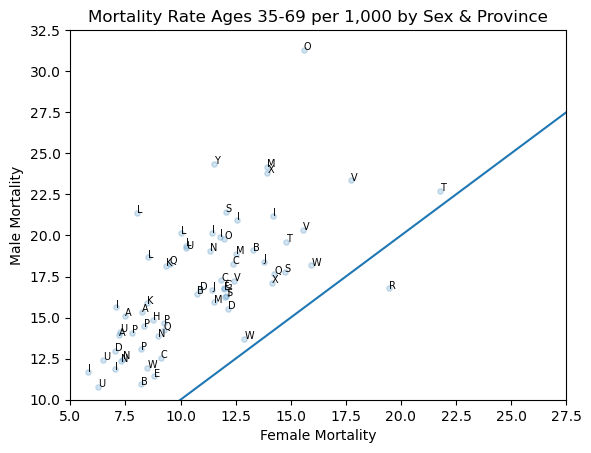

In [38]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m005_ALL35_69']
m = ch89m[ch89m['sex']=='M']['m005_ALL35_69']
# plt.scatter(f,m)
ax.set(xlim=(5, 27.5), ylim=(10, 32.5))
plt.plot([0,35],[0,35])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality Rate Ages 35-69 per 1,000 by Sex & Province', 
       xlabel = 'Female Mortality', ylabel='Male Mortality')

[Text(0.5, 1.0, 'Mortality Rate Ages 0-4 per 1,000 by Sex & Province'),
 Text(0.5, 0, 'Female Mort.'),
 Text(0, 0.5, 'Male Mort.')]

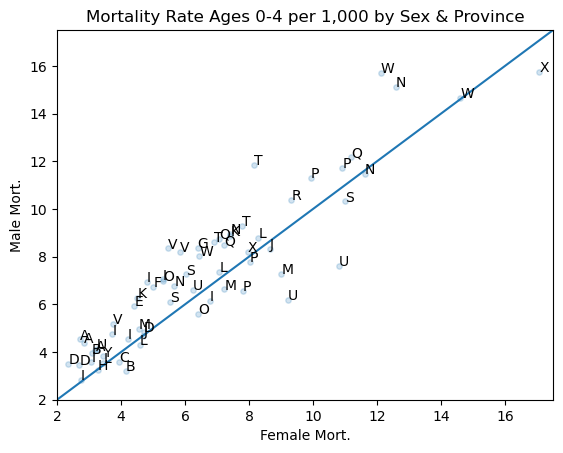

In [39]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m001_ALL0_4']
m = ch89m[ch89m['sex']=='M']['m001_ALL0_4']
# plt.scatter(f,m)
ax.set(xlim=(2, 17.5), ylim=(2, 17.5))
plt.plot([0,35],[0,35])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]))
ax.set(title = 'Mortality Rate Ages 0-4 per 1,000 by Sex & Province', xlabel = 'Female Mort.', ylabel='Male Mort.')

In [40]:
ch89m.iloc[:,3:].corr().head()

,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,m008_MEDICALc,m009_NONMEDb,m010_NONMEDc,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
m001_ALL0_4,1.000000,0.582843,0.517180,0.894158,0.111006,0.118778,0.897255,0.093574,0.407125,0.187873,...,0.096843,0.011572,-0.012018,0.720495,0.342770,0.587231,0.444522,0.220392,0.566385,0.053444
m002_ALL5_14,0.582843,1.000000,0.548948,0.715523,0.239365,-0.030642,0.625288,0.206767,0.518081,0.369085,...,-0.149157,-0.238109,-0.162153,0.225149,0.015198,0.150932,0.090915,0.304808,0.429473,-0.042394
m003_ALL15_34,0.517180,0.548948,1.000000,0.838043,0.367975,0.256531,0.698716,0.310800,0.676564,0.619914,...,-0.184894,-0.085890,-0.239485,0.289979,-0.128777,0.260259,0.214783,0.169245,0.358223,-0.197785
m004_ALL0_34,0.894158,0.715523,0.838043,1.000000,0.265901,0.188240,0.925287,0.224889,0.617458,0.445166,...,-0.048654,-0.061840,-0.139290,0.582364,0.140065,0.482163,0.370635,0.243940,0.548914,-0.069212
m005_ALL35_69,0.111006,0.239365,0.367975,0.265901,1.000000,0.726636,0.174381,0.993936,0.312820,0.578454,...,0.021207,0.124733,-0.003996,0.176172,-0.068947,0.154676,0.132235,0.005709,-0.162452,0.102268


In [41]:
cutoffs = np.array([5,15,35,70,80])
age = 69
durations = np.array([5,10,20,35,10])
print((age >= cutoffs) * durations
)
(age >= cutoffs) * durations
rates = .1,.2,.3,.4

[ 5 10 20  0  0]


In [42]:
sum(np.array([5,10,20,35,10]))

80

M002 ALL5-14    mortality ALL CAUSES AGE 5-14 (stand. rate/100,000)                                                            
M003 ALL15-34   mortality ALL CAUSES AGE 15-34 (stand. rate/100,000)                                                         
M004 ALL0-34    mortality ALL CAUSES AGE 0-34 (stand. rate/100,000)                                                          
M005 ALL35-69   mortality ALL CAUSES AGE 35-69 (stand. rate/1,000)                                 
M006 ALL70-79   mortality ALL CAUSES AGE 70-79 (stand. rate/1,000)    

In [43]:
def survival(table, county, sex, age):
    '''return the survival probability for a given sex, county, and age with age < 79
    'm001_ALL0_4' for all 
    '''
    
    m_0_4 = table.loc[(table['county'] == county) & 
                      (table['sex'] == sex),'m001_ALL0_4']
    m_5_14 = table.loc[(table['county'] == county) &  
                       (table['sex'] == sex),'m002_ALL5_14']
    m_15_34 = table.loc[(table['county'] == county) & 
                        (table['sex'] == sex),'m003_ALL15_34']
    m_35_69 = table.loc[(table['county'] == county) & 
                        (table['sex'] == sex),'m005_ALL35_69']
    m_70_79 = table.loc[(table['county'] == county) & 
                        (table['sex'] == sex),'m006_ALL70_79']
    
    s = 1- np.array([m_0_4/1_000, m_5_14/100_000, m_15_34/100_000, 
                  m_35_69/1_000, m_70_79/1_000]) # survival rates 
    s = s.reshape(5,)

    c = np.array([5,15,35,70,80]) # cutoffs of survival periods
    d = np.array([5,10,20,35,10]) # durations of survival periods
    c_shifted = np.array([0,5,15,35,70,80])
    
    if age > 80:
        return np.prod(np.power(s,d))*(s[-1])**(age-80)
    
    f_b = np.argmin((age >= c)) # final bin
    
    remainder_years = age-c_shifted[f_b]
    
    #probability of survival for whole durations ()
    bands = np.multiply((age >= c),durations)
    # print(f'a_b_boolean: {bands}, type: {type(bands)}')
    s_exp_b = np.power(s,bands)
    
    s_w = np.prod(s_exp_b) 
    # print(f's_w: {s_w}')
    # survival probability remainder duration
    s_r = s[f_b]**(remainder_years)
    # print(f's_r: {s_r}')
    return s_r*s_w

# return np.prod(np.power((1-mort_rates),((age >= cutoffs) * durations)))*\
#     (1-mort_rates[np.argmin((age >= cutoffs))[0]])**(age-cutoffs[np.argmin((age >= cutoffs))[0]])
      
    

In [44]:
surv_probs = []
for i in np.linspace(0,80,81):
    surv_probs.append(survival(ch89m, 'AA', 'T',i))

###### debugging survival function

/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Survival probability by age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Survival probability')]

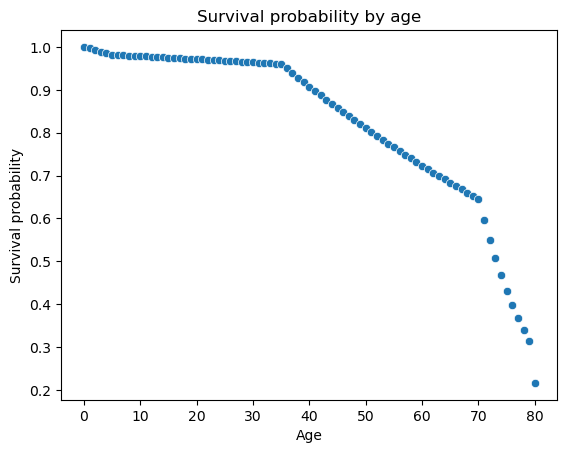

In [45]:
surv_probs
sns.scatterplot(np.linspace(0,80,81),surv_probs).set(
    title = "Survival probability by age",
    xlabel = 'Age',
    ylabel = 'Survival probability')

In [46]:
ch89m[ch89m['county']=='AA']

,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,AA,M,3,4.39,74.75,89.04,134.95,15.08,104.05,77.25,...,3.84,0.46,1.84,7.83,2.61,2.00,0.77,0.0,0.0,4.61
1,AA,F,3,2.83,68.53,60.71,94.76,7.49,50.53,58.71,...,2.68,0.31,0.63,6.14,1.89,2.05,0.31,0.0,0.0,1.57
2,AA,T,3,3.61,71.64,74.88,114.86,11.29,77.29,67.98,...,3.26,0.39,1.24,6.99,2.25,2.02,0.54,0.0,0.0,3.09


survival(ch89m, 'AA', 'T', 3)

In [47]:
np.prod(np.power(s,np.array([5, 0, 0, 0, 0])))

NameError: name 's' is not defined

In [ ]:
print(np.array([1,2,3]))

In [ ]:
survival(ch89m, 'AA', 'T', 80)/survival(ch89m, 'AA', 'T', 70)

In [ ]:
survival(ch89m, 'AA', 'T', 45)/survival(ch89m, 'AA', 'T',44)

###### what are the most significant causes of death for those under 5?

In [ ]:
mortalities_0_4 = [col for col in ch89m.columns.values if col.endswith(('a'))]
mortalities_0_4
m0_4a = ch89m.loc[:,mortalities_0_4].describe().loc['mean'].sort_values(ascending = False)
m0_4a

In [ ]:
sns.barplot(x = m0_4a.values, y = m0_4a.index, color='lightblue').set(
title = 'Cumulative infant mortalities, avg by age 5 per 1,000 ',
xlabel = 'Avg cumulative mortalities by age 5 per 1000',
ylabel = 'Mortality identifier')

In [ ]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m001_ALL0_4']
m = ch89m[ch89m['sex']=='M']['m001_ALL0_4']
# plt.scatter(f,m)
ax.set(xlim=(2, 17.5), ylim=(2, 17.5))
plt.plot([0,35],[0,35])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality Rate Ages 0-4 per 1,000 by Sex & Province', xlabel = 'Female Mort.', ylabel='Male Mort.');

Above we see that there is substantial variation in infant mortalities between village and very little deviation by sex.  there do appear to be some associations by provice.  I would suspect that there would be substantial associations between medical care, wealth, and infant mortality. 

In [ ]:
plot_medical = ch89m.loc[:,mortalities_0_4].corr()['m106_MEDICALa'].abs().sort_values(ascending = False)[0:8]
sns.barplot(x = plot_medical.values, y = plot_medical.index, color = 'lightblue').set(
title = 'Correlations with medical-related mortalities by age 5',
xlabel = 'Correlation Coefficient',
ylabel = 'Mortality identifier')

Respiratory illnesses have the greatest correlation with medical related mortality for ages 0-4

###### I'll next look at mortalities from ages 0 to 34

In [ ]:
mortalities_0_34 = [col for col in ch89m.columns.values if col.endswith(('b','0_34'))]
mortalities_0_34
m0_34 = ch89m.loc[:,mortalities_0_34].describe().loc['mean'].sort_values(ascending = False)
m0_34

In [ ]:
sns.barplot(x = m0_34[0:10].values, y = m0_34[0:10].index, color='lightblue').set(
title = 'Mortality rates by cause, ages 0-34 ',
xlabel = 'Yearly mortalities per 100,00',
ylabel = 'Mortality identifier')

In [ ]:
m0_34_corr = ch89m.loc[:,m0_34.index].corr()['m004_ALL0_34'].sort_values(ascending = False)[0:12]



In [ ]:
plot_medical = ch89m.loc[:,m0_34_corr.index].corr()\
['m004_ALL0_34'].abs().sort_values(ascending = False)[0:20]
sns.barplot(x = plot_medical.values, y = plot_medical.index, color = 'lightblue').set(
title = 'Correlations with all-cause mortality ages 0-34',
xlabel = 'Correlation Coefficient',
ylabel = 'Mortality identifier');

In [ ]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m004_ALL0_34']
m = ch89m[ch89m['sex']=='M']['m004_ALL0_34']
# plt.scatter(f,m)
ax.set(xlim=(80, 425), ylim=(80, 425))
plt.plot([0,425],[0,425])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality Rate Ages 0-34 per 1,000 by Sex & Province', xlabel = 'Female Mort.', ylabel='Male Mort.');

###### Next I'll check out mortalities between ages 35 and 69

In [ ]:
mortalities_35_69 = [col for col in ch89m.columns.values if col.endswith(('c','69'))]
m35_69 = ch89m.loc[:,mortalities_35_69].describe().loc['mean'].sort_values(ascending = False)
m35_69

In [ ]:
sns.barplot(x = m35_69[0:15].values, y = m35_69[0:15].index, color='lightblue').set(
title = 'Mortality rates by cause, ages 35-69 ',
xlabel = 'Yearly mortalities per 100,00',
ylabel = 'Mortality identifier')

In [ ]:
mortalities35_69_corr = list(m35_69.index)

In [ ]:
plot_medical = ch89m.loc[:,mortalities35_69_corr].corr()\
['m005_ALL35_69'].abs().sort_values(ascending = False)[0:8]
plot_medical

In [ ]:
plot_medical = ch89m.loc[:,mortalities35_69_corr].corr()\
['m005_ALL35_69'].abs().sort_values(ascending = False)[0:20]
sns.barplot(x = plot_medical.values, y = plot_medical.index, color = 'lightblue').set(
title = 'Correlations with all-cause mortality ages 35-69',
xlabel = 'Correlation Coefficient',
ylabel = 'Mortality identifier');

In [ ]:
sns.heatmap(ch89m.loc[:,mortalities35_69_corr][ch89m.loc[:,mortalities35_69_corr].corr()\
['m005_ALL35_69'].abs().sort_values(ascending = False)[2:9].index].corr()).set(
title = 'Correlations between the leading correlates with ALL35_69' )

In [ ]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m059_ALLVASCc']*100
m = ch89m[ch89m['sex']=='M']['m059_ALLVASCc']*100
# plt.scatter(f,m)
ax.set(xlim=(0, 1250), ylim=(5, 1250))
plt.plot([0, 1250],[0, 1250])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]),fontsize = 7)
ax.set(title = 'Mortality: allvascular, Ages 35-69 per 100,000 by Sex & Province', 
       xlabel = 'Female Mort.', ylabel='Male Mort.');

In [ ]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m065_STROKEc']
m = ch89m[ch89m['sex']=='M']['m065_STROKEc']
# plt.scatter(f,m)
ax.set(xlim=(0, 620), ylim=(5, 620))
plt.plot([0, 800],[0, 800])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality: Cerebrovascular, Ages 35-69 per 100,000 by Sex & Province', 
       xlabel = 'Female Mort.', ylabel='Male Mort.');

In [ ]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m023_ALLCAc']*100
m = ch89m[ch89m['sex']=='M']['m023_ALLCAc']*100
# plt.scatter(f,m)
ax.set(xlim=(0, 1400), ylim=(0, 1400))
plt.plot([0, 1400],[0, 1400])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality: Cancer, Ages 35-69 per 100,000 by Sex & Province', 
       xlabel = 'Female Mort.', ylabel='Male Mort.');
plt.savefig('../assets/mortality_cancer.png')

Idea: cluster analysis of villages

###### send mortality targets to dataframe

In [ ]:
mortality_df = pd.DataFrame(['m005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc'], columns=['mortality_targets'])
mortality_df['mortality_targets'].values

In [ ]:
mortality_df.to_csv('../data/cleaned_data_descriptive/mortality_list.csv')

###### looking at correlations between mortality and explanatory data

In [ ]:
ch89pru_filtered = ch89pru.loc[(ch89pru['xiang']==3) & (ch89pru['sex']=='T'),:]

In [ ]:
# ch89m[ch89m.loc['sex'=='T',]]['county','m059_ALLVASCc','xiang']

ch89m.loc[ch89m['sex']=='T',]

In [ ]:
ch89m

In [ ]:
[ch89m['sex']=='T']

In [ ]:
ch89m[['county','m059_ALLVASCc','xiang']][ch89m['sex']=='T']

In [ ]:
plasma_vasc = pd.merge(ch89pru_filtered, 
                       ch89m[['county','m059_ALLVASCc','xiang']][ch89m['sex']=='T'], on=['county','xiang'])

In [ ]:
plasma_vasc.corr()['m059_ALLVASCc'].sort_values(ascending = False)[1:15]

In [ ]:
plt.scatter(plasma_vasc['r009'],plasma_vasc['m059_ALLVASCc'])

There is a slight correlation of 0.445968 between red blood cell TOTAL LIPID MYRISTIC ACID (14:0) (% of total fatty acid by weight) and cardio-vascular disease mortality

In [ ]:
plasma_vasc.shape

In [ ]:
plt.scatter(plasma_vasc['p016'],plasma_vasc['m059_ALLVASCc']).set(
title = 'lycopene')

It is strange that lycopene would have a positive correlation (0.438972)  with cardiovascular mortality.